<a href="https://colab.research.google.com/github/Kevin3599/Deap-learning-intro-Repository/blob/main/Deep_learning_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

228827136/228813984 [==============================] - 2s 0us/step


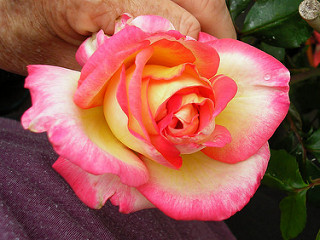

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))
PIL.Image.open(str(roses[1]))
#验证数据集

In [ ]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [ ]:
import torch
x = torch.tensor([5.5,3])
print(x)

tensor([5.5000, 3.0000])


In [ ]:
tensor1 = torch.tensor([5.5, 3])
print(tensor1)
tensor2 = tensor1.new_ones(5, 3, dtype=torch.double)
print(tensor2)
tensor3 = torch.randn_like(tensor2, dtype=torch.float)
print('tensor3: ', tensor3)
print(tensor3[:, 0])

tensor([5.5000, 3.0000])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor3:  tensor([[-0.0916, -0.6423,  0.5104],
        [-0.3027,  0.2088,  0.9039],
        [-0.3727,  0.4278,  0.3412],
        [ 0.8959, -0.6906, -0.6759],
        [-0.7324, -0.3666,  0.5435]])
tensor([-0.0916, -0.3027, -0.3727,  0.8959, -0.7324])


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

938
157


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


tensor(2) tensor(0) tensor(9) tensor(8) tensor(9) tensor(8) tensor(7) tensor(2) 
tensor(3) tensor(7) tensor(4) tensor(9) tensor(7) tensor(8) tensor(8) tensor(0) 
tensor(2) tensor(3) tensor(3) tensor(2) tensor(6) tensor(4) tensor(5) tensor(0) 
tensor(5) tensor(9) tensor(7) tensor(1) tensor(3) tensor(4) tensor(9) tensor(5) 
tensor(7) tensor(4) tensor(2) tensor(1) tensor(4) tensor(5) tensor(0) tensor(7) 
tensor(3) tensor(6) tensor(0) tensor(9) tensor(7) tensor(1) tensor(4) tensor(9) 
tensor(1) tensor(3) tensor(6) tensor(7) tensor(6) tensor(5) tensor(1) tensor(2) 
tensor(1) tensor(9) tensor(4) tensor(9) tensor(4) tensor(5) tensor(9) tensor(9) 


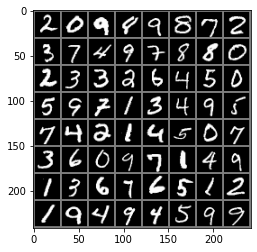

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  100] loss :2.293
[1,  200] loss :2.267
[1,  300] loss :2.214
[1,  400] loss :2.066
[1,  500] loss :1.603
[1,  600] loss :0.877
[1,  700] loss :0.585
[1,  800] loss :0.467
[1,  900] loss :0.401
[2,  100] loss :0.342
[2,  200] loss :0.301
[2,  300] loss :0.284
[2,  400] loss :0.255
[2,  500] loss :0.244
[2,  600] loss :0.229
[2,  700] loss :0.208
[2,  800] loss :0.189
[2,  900] loss :0.186
[3,  100] loss :0.168
[3,  200] loss :0.164
[3,  300] loss :0.152
[3,  400] loss :0.146
[3,  500] loss :0.141
[3,  600] loss :0.141
[3,  700] loss :0.134
[3,  800] loss :0.131
[3,  900] loss :0.111
Finished Training


In [1]:
import numpy as np
import torch 
from torch import nn
from PIL import Image
import matplotlib.pyplot as plt
import os
from torchvision import datasets, transforms,utils
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize(mean=[0.5],std=[0.5])])
train_data = datasets.MNIST(root = "./data/",
                            transform=transform,
                            train = True,
                            download = True)

test_data = datasets.MNIST(root="./data/",
                           transform = transform,
                           train = False)
train_loader = torch.utils.data.DataLoader(train_data,batch_size=64,
                                          shuffle=True,num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=64,
                                          shuffle=True,num_workers=2)
print(len(train_loader))
print(len(test_loader))
images, lables = next(iter(train_loader))
img = utils.make_grid(images)
# transpose 转置函数(x=0,y=1,z=2),新的x是原来的y轴大小，新的y是原来的z轴大小，新的z是原来的x大小
#相当于把x=1这个一道最后面去。
img = img.numpy().transpose(1,2,0) 
std = [0.5]
mean = [0.5]
img = img * std + mean
for i in range(64):
    print(lables[i], end=" ")
    i += 1
    if i%8 is 0:
        print(end='\n')
plt.imshow(img)
plt.show()
import torch.nn.functional as F
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(1,32,kernel_size=3,stride=1,padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1)
        self.fc1 = nn.Linear(64*7*7,1024)#两个池化，所以是7*7而不是14*14
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512,10)
#         self.dp = nn.Dropout(p=0.5)
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        x = x.view(-1, 64 * 7* 7)#将数据平整为一维的 
        x = F.relu(self.fc1(x))
#         x = self.fc3(x)
#         self.dp(x)
        x = F.relu(self.fc2(x))   
        x = self.fc3(x)  
#         x = F.log_softmax(x,dim=1) NLLLoss()才需要，交叉熵不需要
        return x

net = CNN()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#也可以选择Adam优化方法
# optimizer = torch.optim.Adam(net.parameters(),lr=1e-2)
train_accs = []
train_loss = []
test_accs = []
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = net.to(device)
for epoch in range(3):
    running_loss = 0.0
    for i,data in enumerate(train_loader,0):#0是下标起始位置默认为0
        # data 的格式[[inputs, labels]]       
#         inputs,labels = data
        inputs,labels = data[0].to(device), data[1].to(device)
        #初始为0，清除上个batch的梯度信息
        optimizer.zero_grad()         

        #前向+后向+优化     
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        # loss 的输出，每个一百个batch输出，平均的loss
        running_loss += loss.item()
        if i%100 == 99:
            print('[%d,%5d] loss :%.3f' %
                 (epoch+1,i+1,running_loss/100))
            running_loss = 0.0
        train_loss.append(loss.item())

        # 训练曲线的绘制 一个batch中的准确率
        correct = 0
        total = 0
        _, predicted = torch.max(outputs.data, 1)
        total = labels.size(0)# labels 的长度
        correct = (predicted == labels).sum().item() # 预测正确的数目
        train_accs.append(100*correct/total)

print('Finished Training')
PATH = './mnist_net.pth'
torch.save(net.state_dict(), PATH)

In [4]:
def draw_train_process(title,iters,costs,accs,label_cost,lable_acc):
    plt.title(title, fontsize=24)
    plt.xlabel("iter", fontsize=20)
    plt.ylabel("acc(\%)", fontsize=20)
    plt.plot(iters, costs,color='red',label=label_cost) 
    plt.plot(iters, accs,color='green',label=lable_acc) 
    plt.legend()
    plt.grid()
    plt.show()
train_iters = range(len(train_accs))
draw_train_process('training',train_iters,train_loss,train_accs,'training loss','training acc')

NameError: ignored

tensor(5) tensor(0) tensor(7) tensor(6) tensor(0) tensor(4) tensor(3) tensor(3) 
tensor(8) tensor(3) tensor(3) tensor(4) tensor(1) tensor(5) tensor(5) tensor(5) 
tensor(7) tensor(3) tensor(6) tensor(2) tensor(7) tensor(6) tensor(5) tensor(5) 
tensor(2) tensor(6) tensor(5) tensor(1) tensor(9) tensor(3) tensor(1) tensor(4) 
tensor(1) tensor(9) tensor(3) tensor(8) tensor(7) tensor(0) tensor(3) tensor(4) 
tensor(7) tensor(7) tensor(9) tensor(6) tensor(3) tensor(9) tensor(2) tensor(5) 
tensor(4) tensor(5) tensor(1) tensor(5) tensor(8) tensor(9) tensor(8) tensor(9) 
tensor(0) tensor(7) tensor(8) tensor(5) tensor(2) tensor(6) tensor(4) tensor(6) 


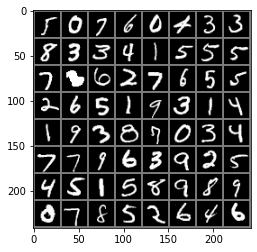

In [ ]:
images, lables = next(iter(train_loader))
img = utils.make_grid(images)
# transpose 转置函数(x=0,y=1,z=2),新的x是原来的y轴大小，新的y是原来的z轴大小，新的z是原来的x大小
#相当于把x=1这个一道最后面去。
img = img.numpy().transpose(1,2,0) 
std = [0.5]
mean = [0.5]
img = img * std + mean
for i in range(64):
    print(lables[i], end=" ")
    i += 1
    if i%8 is 0:
        print(end='\n')
plt.imshow(img)
plt.show()